# Purpose

This notebook generates visualizations of key hydrogen bonds and other observables that define the catalytic site of the hairpin ribozyme, versus time.

The resulting plots are featured in Figure 5, S2, S3 and  S4of the supporting information for the article DOI: 10.1021/acs.jctc.4c00294.

# Modules

In [23]:
# Basics
import sys
import os
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm


# Specific to biomolecular simulations
import MDAnalysis as mda

# My functions
import functions as myfuncs

# Charge data

Here we charge the df which contains all the values of the data, which has already been computed for each frame of the trajectory, and which have been sotred as an array, inside a CSV file format. 

The array must contain several columns, which are required for the production of the plot (see bellow).



In [24]:
# Load the data
my_path = "../Examples/"
my_name = "A_HairpinRibozyme_REST2_traj"

df = pd.read_csv(my_path + my_name + ".csv")

# Plot

In [25]:
# These are the data from the df, and which will be used for the analysis.
data_names = [
    "d_A-1:O2prime-G8:N1",
    "d_A-1:O2prime-A10:N6",
    "d_A-1:O2prime-A38:N6",
    "d_A-1:O2prime-G+1:O1P",
    "d_A-1:O2prime-G+1:O2P",
    "d_G+1:O1P-G8:N2",
    "d_G+1:O2P-G8:N2",
    "A-1_puckering_pseudorot",
    "IAA",
    "d_A-1:O2prime-G+1:P",
    "tau2",
]

long_names = [
    "A-1:O2' - G8:N1",
    "A-1:O2' - A10:N6",
    "A-1:O2' - A38:N6",
    "A-1:O2'- G+1:pro-Sp",
    "A-1:O2' - G+1:pro-Rp",
    "G+1:pro-Sp - G8:N2",
    "G+1:pro-Rp - G8:N2",
    "A-1 pseudo-rotation (°)",
    "IAA (°)",
    "A-1:O2' - G+1:P",
]

Time of last frame =  672600.0
nb of frames= 13453
size of step =  0.0 50.0 49.99628335687207
Starting frame :  7000 350000.0 ps 350000
States
L2       81.078568
Other    18.921432
Name: count, dtype: float64


/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/forget/software/anaconda3/envs/mdaenv2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

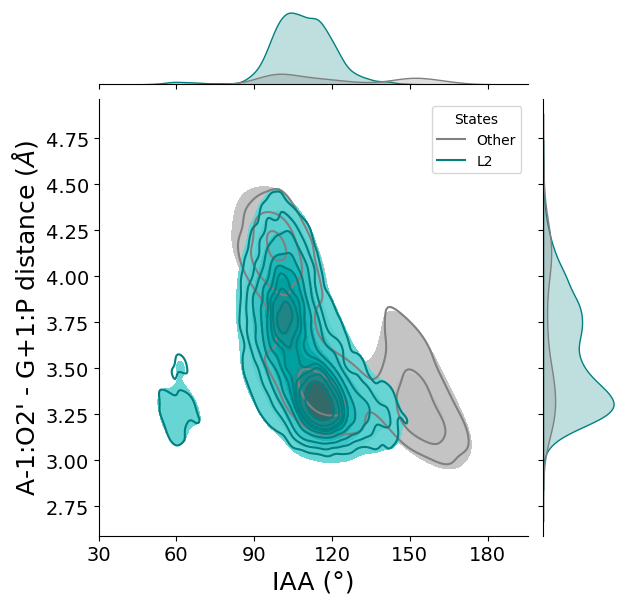

In [27]:
states_dic = {"LC": "darksalmon", "L2": "teal", "L1": "orchid", "Other": "grey"}


Start_times = [350000] * len(Selection)
End_times = [0] * len(Selection)
All_States = [[]]
c = 0


time = df["Time"]
print("Time of last frame = ", time[len(time) - 1])
print("nb of frames=", len(time))
step = int(time[1])
print("size of step = ", time[0], time[1], str(float(time[len(time) - 1]) / len(time)))
start_frame = int(Start_times[c] / step)
print(
    "Starting frame : ", str(start_frame), str(time[start_frame]), "ps", Start_times[c]
)
if End_times[c] != 0:
    end_frame = int(End_times[c] / step)
    print("Ending frame : ", str(end_frame), str(time[end_frame]), "ps", End_times[c])
else:
    end_frame = len(time)


da = {}
data = pd.DataFrame(da)
for d in range(len(data_names)):
    if data_names[d] in df.columns:
        Values = df[data_names[d]]
        data[data_names[d]] = Values[start_frame:end_frame]
    else:
        print(data_names[d], "not found")
# print(np.mean(data["IAA"]))
nbOfFrames, nbdatas = data.shape

States = []
pu = data["A-1_puckering_pseudorot"].values
dG8 = data["d_A-1:O2prime-G8:N1"].values
dA38 = data["d_A-1:O2prime-A38:N6"].values
dA10 = data["d_A-1:O2prime-A10:N6"].values
dO1P = data["d_A-1:O2prime-G+1:O1P"].values
dO2P = data["d_A-1:O2prime-G+1:O2P"].values
for s in range(nbOfFrames):
    if (
        (0 < pu[s] < 43 or 339 < pu[s]) and dA38[s] < 3.5 and dO2P[s] < dO1P[s]
    ):  # and dO2P[s] < 3.5:
        States.append("L2")
    elif (
        (0 < pu[s] < 43 or 339 < pu[s]) and dA10[s] < 3.5 and dO2P[s] < dO1P[s]
    ):  # and dO2P[s] < 3.5:
        States.append("L2")
    elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO1P[s] < dO2P[s]:
        States.append("L1")
    elif 138 < pu[s] < 205 and dG8[s] < 3.5 and dO2P[s] < dO1P[s]:
        States.append("LC")
    else:
        States.append("Other")


data["States"] = States


#####
print(data["States"].value_counts() / len(data) * 100)
# print(All_States[c][0], Jump_time[c]/step * 1/len(data)*100)
# print("CS :",str(data['CS'].value_counts()/len(data)), "%")
# print("Non-Aligned :",str(data['Non-Aligned'].value_counts()/len(data)), "%")
# print("Aligned :",str(data['Aligned'].value_counts()/len(data)), "%")
# print("Other :",str(data['Other'].value_counts()/len(data)), "%")


g = sns.jointplot(
    x="IAA",
    y="d_A-1:O2prime-G+1:P",
    hue="States",
    data=data,
    kind="kde",
    fill=True,
    figsize=22,
    palette={
        "LC": states_dic.get("LC"),
        "L1": states_dic.get("L1"),
        "L2": states_dic.get("L2"),
        "Other": states_dic.get("Other"),
    },
)
g.plot_joint(sns.kdeplot, bw_adjust=0.65, thresh=0.05)


# Customize legend font sizes (if needed)

# Customize the legend manually
xtick_label_fontsize = 14
ytick_label_fontsize = 14
custom_xticks = [30, 60, 90, 120, 150, 180]
custom_yticks = [2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75]
g.ax_joint.set_ylabel("A-1:O2' - G+1:P distance ($\AA$)", fontsize=18)
g.ax_joint.set_xlabel("IAA (°)", fontsize=18)
g.ax_joint.set_xticks(custom_xticks)
g.ax_joint.set_yticks(custom_yticks)
# g.ax_joint.set_ylim(2.75,4.75)
# g.ax_joint.set_xlim(20,190)
g.ax_joint.tick_params(axis="both", which="both", labelsize=xtick_label_fontsize)
g.ax_joint.yaxis.set_tick_params(labelsize=ytick_label_fontsize)

# legend_labels = ['KDE Plot']  # Customize the legend label
# g.ax_joint.legend(legend_labels, loc='upper right', fontsize='10')  # Adjust the location and font size
# plt.savefig(Nextcloudpath + str(i) + "_2Dhistograms_IAA_dO2primeP"+str(start_frame) +"-"+ str(end_frame) +"_wStates.png", bbox_inches='tight')
plt.show()